In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("train_data_fake_news.csv")
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
data.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data=data.dropna()

In [7]:
x=data.drop(["id"],axis=1)
y=data.label

In [8]:
x.shape

(18285, 4)

In [9]:
y.shape

(18285,)

In [10]:
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.embeddings import Embedding

## Apply Word Embedding Techniques

### One hot representation

In [11]:
vocab_size=5000

In [12]:
message=x.copy()

In [13]:
message["title"][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [14]:
message.reset_index(inplace=True)

In [15]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
ps=PorterStemmer()
corpus=[]
for i in range(0,len(message)):
    review=re.sub("[^a-zA-Z]"," ",message["title"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [17]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [18]:
encoded_data=[one_hot(words,vocab_size)for words in corpus]
(encoded_data[0])

[4875, 2167, 765, 364, 1288, 1098, 4994, 3728, 1050, 61]

In [19]:
max_len=30
embedded_docs=pad_sequences(encoded_data,maxlen=max_len,padding="pre")

In [20]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0, 4875, 2167,
        765,  364, 1288, 1098, 4994, 3728, 1050,   61])

In [39]:
from tensorflow.keras.layers import Dropout
embedded_vector_features=30
model=Sequential()
model.add(Embedding(vocab_size,embedded_vector_features,input_length=max_len))
model.add(Dropout(0.3))
model.add(LSTM(70))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 30)            150000    
                                                                 
 dropout_4 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_3 (LSTM)               (None, 70)                28280     
                                                                 
 dropout_5 (Dropout)         (None, 70)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 178,351
Trainable params: 178,351
Non-trainable params: 0
_________________________________________________________________


In [40]:
len(embedded_docs),y.shape

(18285, (18285,))

In [41]:
x_final=np.array(embedded_docs)
y_final=np.array(y)

In [42]:
x_final

array([[   0,    0,    0, ..., 3728, 1050,   61],
       [   0,    0,    0, ...,  373,   61, 1462],
       [   0,    0,    0, ..., 2387, 4911,  359],
       ...,
       [   0,    0,    0, ..., 3435,  776, 2196],
       [   0,    0,    0, ..., 3969, 1963, 2672],
       [   0,    0,    0, ...,  694, 4269, 2023]])

In [43]:
y_final

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((14628, 30), (3657, 30))

In [46]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor="val_loss")
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,callbacks=[earlystop]) 

Epoch 1/10
229/229 [==============================] - 15s 49ms/step - loss: 0.3495 - accuracy: 0.8364 - val_loss: 0.1979 - val_accuracy: 0.9147
Epoch 2/10
229/229 [==============================] - 10s 43ms/step - loss: 0.1504 - accuracy: 0.9393 - val_loss: 0.1880 - val_accuracy: 0.9188


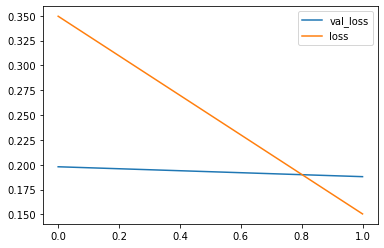

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history["val_loss"],label="val_loss")
plt.plot(history.history["loss"],label="loss")
plt.legend()

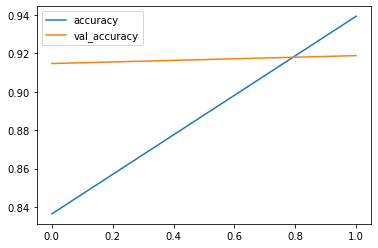

In [48]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=(model.predict(x_test)>(0.5)).astype(int)

In [50]:
accuracy_score(y_test,y_pred)

0.918785890073831

In [51]:
confusion_matrix(y_test,y_pred)

array([[1909,  173],
       [ 124, 1451]], dtype=int64)

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2082
           1       0.89      0.92      0.91      1575

    accuracy                           0.92      3657
   macro avg       0.92      0.92      0.92      3657
weighted avg       0.92      0.92      0.92      3657



In [76]:
data=data.iloc[:3657,:]
len(data)
data.reset_index(inplace=True)

In [77]:
len(data),len(y_pred)

(3657, 3657)

In [78]:
final = pd.DataFrame()
final['id']=data['id']
final['label'] = y_pred

In [79]:
final.head()

,id,label
0,8331,1
1,8332,0
2,8333,0
3,8334,0
4,8337,1
